<font size=6>KNN (K-Nearest Neighbor)</font><br>
<font size=5>Autor: <font color="#2890f9"> María Camila Gómez Hernández <br></font>
<font size=3>GitHub: <font color="#A371F7"> @TrashCam9 <br></font>
<font size=3>Cuenta uniandes: <font color="#FFF200"> mc.gomezh1</font>

K-nearest neighbor es un algoritmo de aprendizaje supervisado que puede ser usado para problemas de regresión y de clasificación. KNN funciona en el principio de asumir que cualquier datos cercano a otro cae en la misma clase, clasifica un nuevo dato basado en la similitud.

In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos

In [2]:
data = pd.read_csv('./data/datos_convertidos.csv')

In [3]:
data.shape

(61874, 19)

In [4]:
data.head()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0,26.50,0,0,0,0,0,0,1,60,0,0,1,3,8.0,0,0,0,0
1,1,28.75,0,0,0,0,2,0,1,55,0,0,1,3,7.0,0,0,0,0
2,2,19.90,1,0,0,0,1,0,1,65,0,0,1,2,7.0,0,0,0,0
3,3,28.06,0,0,0,1,1,0,0,65,0,1,1,2,8.0,0,0,0,0
4,4,29.29,1,0,0,0,1,0,0,70,0,0,1,3,7.0,1,0,0,0


# 2. Entedimiento de los datos

Al realizar el preparamiento de los datos cambios los tipos de algunas columnas para que nuestro algoritmo pudiera procesarlas de buena forma.

In [5]:
data.dtypes

Index                 int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
HeartDisease          int64
dtype: object

In [6]:
data.describe()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.00000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000
mean,33783.843779,28.300153,0.437163,0.067540,0.076042,3.430666,3.941559,0.139558,0.535346,64.663510,0.71665,0.225038,0.776530,2.609901,7.102267,0.132624,0.037092,0.094337,0.086094
std,19500.423273,6.211283,0.496040,0.250958,0.265067,8.100786,8.117292,0.346530,0.574922,7.464508,1.45877,0.510276,0.416574,1.025881,1.408602,0.339171,0.188988,0.292299,0.280506
min,0.000000,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16885.250000,24.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.00000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,33829.500000,27.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.00000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,50690.750000,31.190000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,65.000000,1.00000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,67499.000000,86.800000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,2.000000,80.000000,5.00000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000,1.000000


# 3. Limpieza y preparación de los datos

El proceso de limpieza lo realizamos en el notebook llamado [PrepDatos.ipynb](PrepDatos.ipynb) 

Graficamos nuestra variable objetivo

<AxesSubplot:title={'center':'# personas que han reportado CHD o MI'}, xlabel='HeartDisease', ylabel='count'>

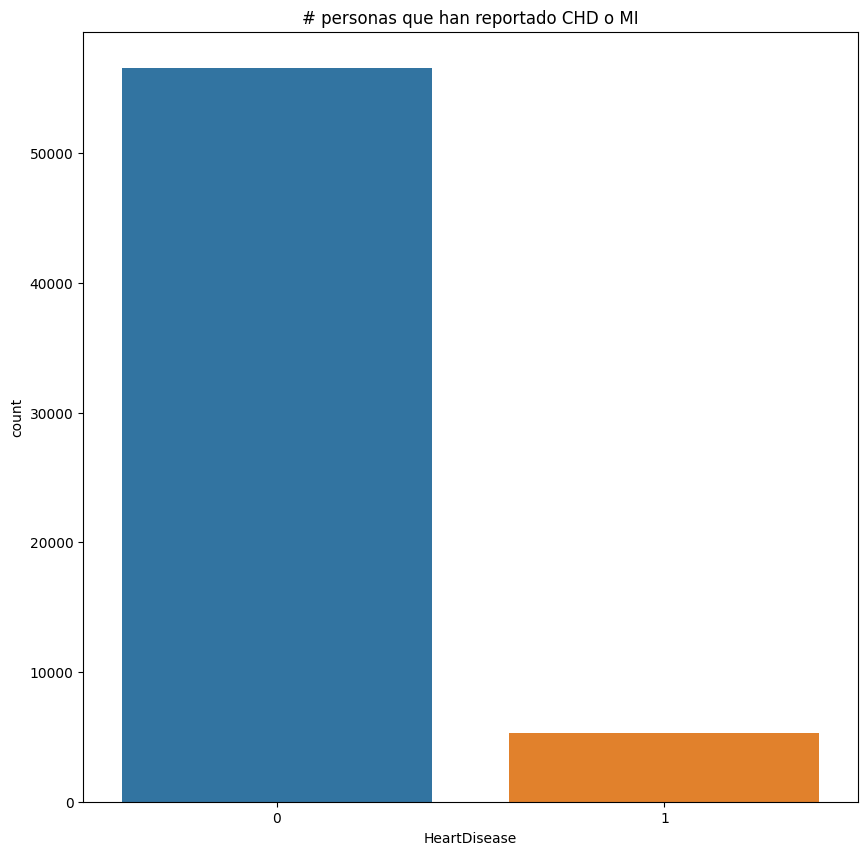

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.title('# personas que han reportado CHD o MI')
sns.countplot(x='HeartDisease', data=data)

### Selección de atributos / features para la clasificación

Como en el preprocesamiento todas las variables se convertieron de categoricas a numericas, podemos usarlas directamente en el modelo. Eliminamos de la lista que creamos con todas las columnas a nuestra variable objetivo y a la columna index.

In [10]:
features = list(data.columns)
features.remove('Index')
features.remove('HeartDisease')

### Particionamiento del conjunto de datos en entrenamiento y prueba

Utilizamos la estrategia hold-out

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(data[features], data['HeartDisease'], test_size = 0.2, random_state = 0)

In [12]:
print('Tamaño del conjunto original:', data.shape[0])
print('Tamaño del conjunto de entrenamiento:', X_train.shape[0])
print('Tamaño del conjunto de prueba:', X_test.shape[0])

Tamaño del conjunto original: 61874
Tamaño del conjunto de entrenamiento: 49499
Tamaño del conjunto de prueba: 12375


In [13]:
Y_train.value_counts(normalize = True)

0    0.913614
1    0.086386
Name: HeartDisease, dtype: float64

In [14]:
Y_test.value_counts(normalize = True)

0    0.915071
1    0.084929
Name: HeartDisease, dtype: float64

# 4. Entrenamiento de primer modelo con KNN

Usaremos el default value de n_neighbors para el primer modelo (3).

In [15]:
knn_model = KNeighborsClassifier()

Entrenamiento del modelo:

In [16]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

Generación de predicciones para entrenamiento y test

In [17]:
preds_train = knn_model.predict(X_train)
preds_test = knn_model.predict(X_test)

Revisamos la accuracy del modelo en abmos conjuntos en terminos porcentuales

In [18]:
print('Accuracy (train):', accuracy_score(Y_train, preds_train))
print('Accuracy (test):', accuracy_score(Y_test, preds_test))

Accuracy (train): 0.9213923513606336
Accuracy (test): 0.9056969696969697


Construimos la matriz de confusión para saber si se equivocó más prediciendo la clase positiva o negativa.

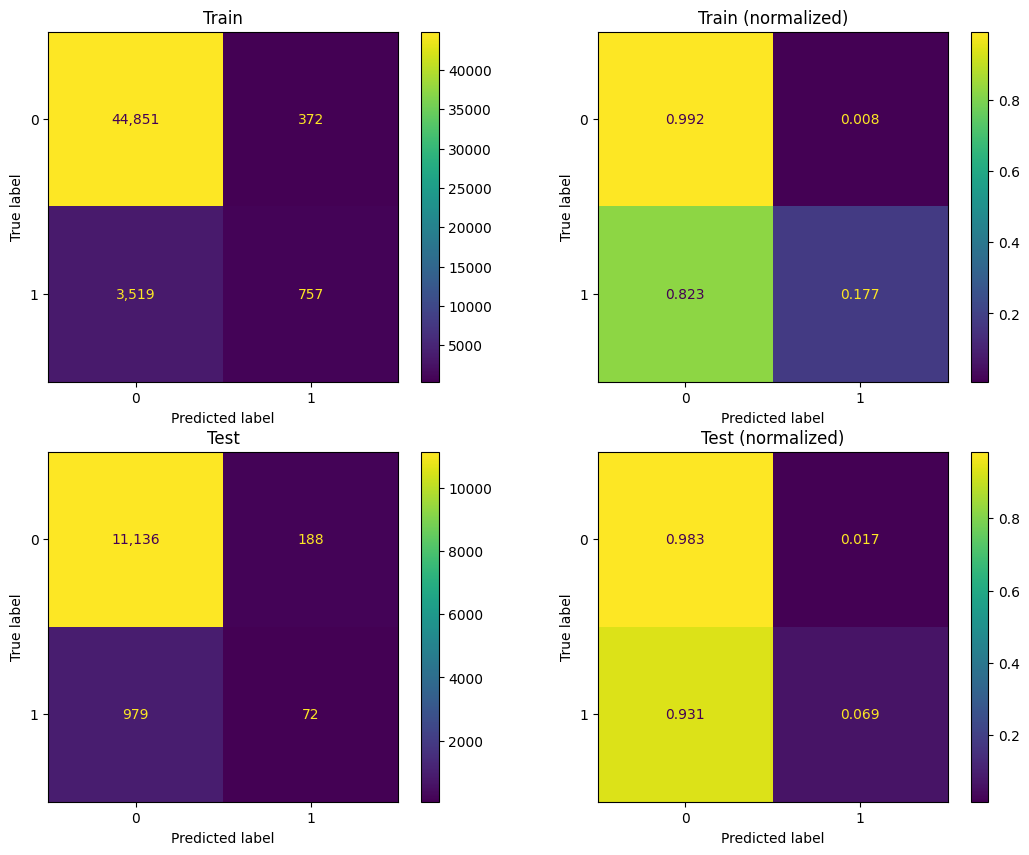

In [19]:
cm_train = confusion_matrix(Y_train, preds_train, labels = knn_model.classes_)
cm_test = confusion_matrix(Y_test, preds_test, labels = knn_model.classes_)
cm_train_norm = confusion_matrix(Y_train, preds_train, labels = knn_model.classes_, normalize = 'true')
cm_test_norm = confusion_matrix(Y_test, preds_test, labels = knn_model.classes_, normalize = 'true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = knn_model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = knn_model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = knn_model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = knn_model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

Podemos ver que nuestro modelo está prediciendo la mayoria de los datos como negativos, incluso si son positivos.

Calculamos la metrica f1 para las siguientes comparaciones de los modelos

In [ ]:
pd.DataFrame([
    {
        'Train': f1_score(Y_train, preds_train),
        'Test': f1_score(Y_test, preds_test)
    }
], index = ['F1'])

,Train,Test
F1,0.280111,0.10984


### Estandarización de datos para predicción

In [20]:
X_train[features].head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
34849,29.27,1,0,0,0,0,1,1,65,0,0,1,1,6.0,0,0,1
31187,26.93,0,0,0,0,0,0,0,65,0,1,0,3,6.0,0,0,0
22350,25.00,0,0,0,0,7,0,1,60,0,1,1,4,8.0,0,0,0
31146,29.16,0,0,0,0,0,0,1,60,0,0,1,2,7.0,0,0,0
61510,20.60,0,0,0,0,0,0,0,65,0,0,1,4,6.0,0,0,0


En este ejemplo revisamos las graficas normales y estandarizadas para ver el cambio de las metricas en BMI.

<AxesSubplot:>

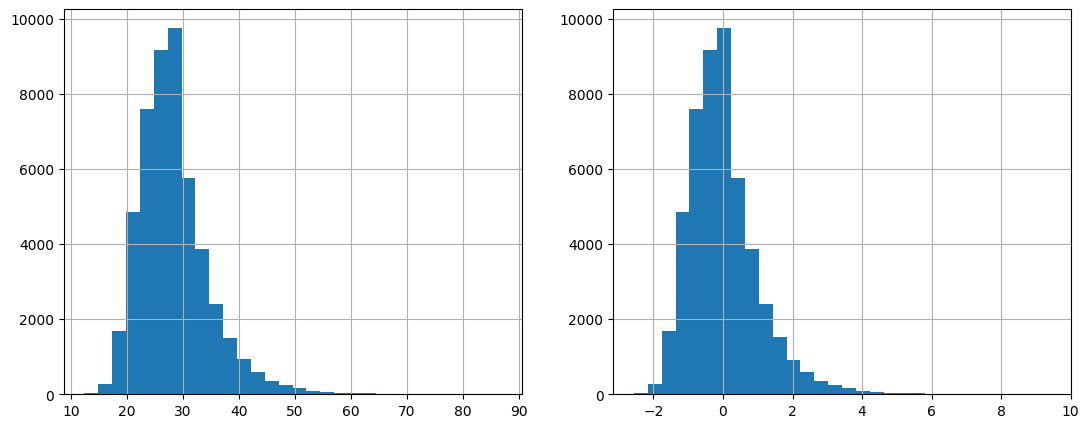

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 5))
X_train['BMI'].hist(bins = 30, ax = ax1)
((X_train['BMI'] - X_train['BMI'].mean()) / X_train['BMI'].std()).hist(bins = 30, ax = ax2)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

# 5. Entrenamiento de segundo modelo basado en KNN con datos estandarizados

Hacemos el proceso anterior de el fit y predict, con k = 3

In [24]:
knn_model.fit(scaler.transform(X_train), Y_train)

KNeighborsClassifier()

In [25]:
preds_train = knn_model.predict(scaler.transform(X_train))
preds_test = knn_model.predict(scaler.transform(X_test))

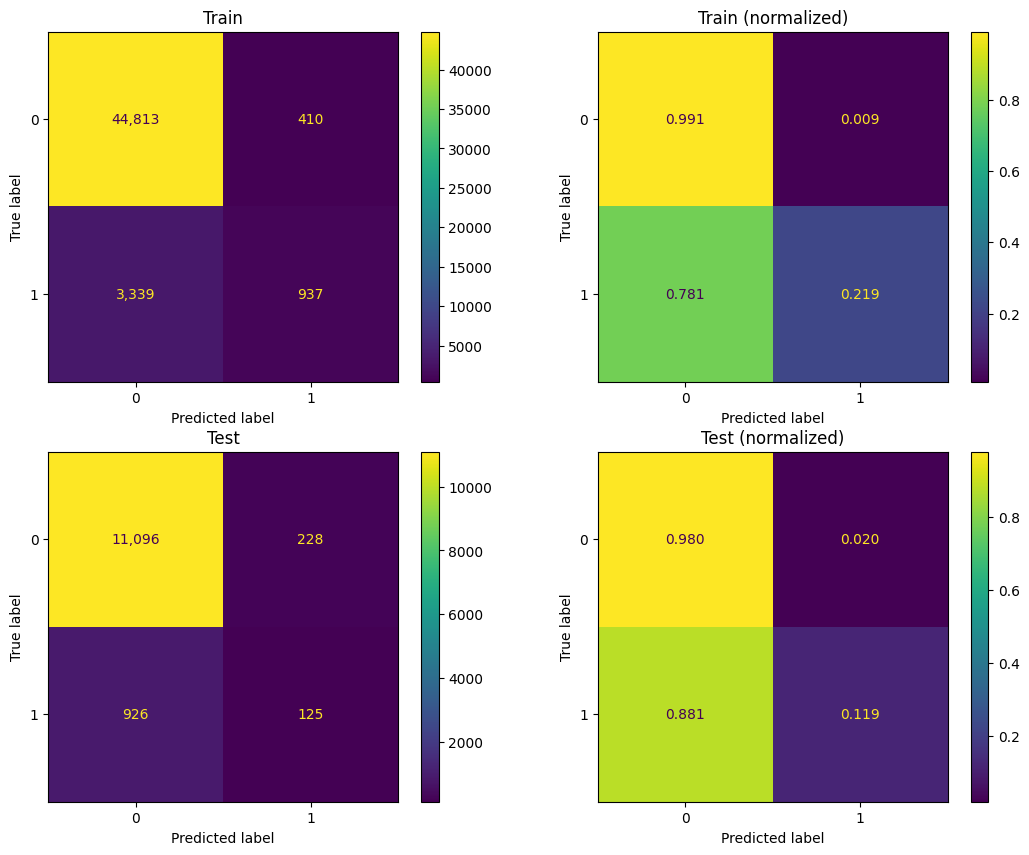

In [26]:
cm_train = confusion_matrix(Y_train, preds_train, labels = knn_model.classes_)
cm_test = confusion_matrix(Y_test, preds_test, labels = knn_model.classes_)
cm_train_norm = confusion_matrix(Y_train, preds_train, labels = knn_model.classes_, normalize = 'true')
cm_test_norm = confusion_matrix(Y_test, preds_test, labels = knn_model.classes_, normalize = 'true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = knn_model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = knn_model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = knn_model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = knn_model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [27]:
pd.DataFrame([
    {
        'Train': f1_score(Y_train, preds_train),
        'Test': f1_score(Y_test, preds_test)
    }
], index = ['F1'])

,Train,Test
F1,0.333274,0.178063


Se puede notar que con la estandarización la predicción es un poco mejor pero aun así hay demasiados positivos que son detectados falsos.

# 6. Busqueda de mejor modelo con GridSearchCV

Podemos cambiar de k para saber qué K es más apropiado para nuestro modelo. Utilizarenos f1 para saber cual es mejor.

In [50]:
k_range = list(range(1,15))

In [51]:
param_grid = dict(n_neighbors = k_range)
param_grid['weights'] = ['uniform', 'distance']
param_grid['p'] = [1, 2]

In [52]:
grid = GridSearchCV(knn_model, param_grid, cv = 10, scoring = 'f1', return_train_score = False)
grid.fit(scaler.transform(X_train), Y_train)

In [ ]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.20927153 0.20927153 0.10176675 0.20940278 0.18869325 0.18988912
 0.10588668 0.19155914 0.16584226 0.17669625 0.09875449 0.1704424
 0.13992373 0.15718134 0.0930762  0.15622724 0.1279191  0.14091542
 0.09035332 0.13777568 0.11959659 0.13190746 0.0868185  0.13168223
 0.11139476 0.12341746 0.07650714 0.11605191]


In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.20940278046067937
{'n_neighbors': 2, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=2, weights='distance')


In [ ]:
mejor_pred_train = grid.predict(X_train)
mejor_pred_test = grid.predict(X_test)

In [ ]:
cm_train = confusion_matrix(Y_train, mejor_pred_train, labels = knn_model.classes_)
cm_test = confusion_matrix(Y_test, mejor_pred_test, labels = knn_model.classes_)
cm_train_norm = confusion_matrix(Y_train, mejor_pred_train, labels = knn_model.classes_, normalize = 'true')
cm_test_norm = confusion_matrix(Y_test, mejor_pred_test, labels = knn_model.classes_, normalize = 'true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = knn_model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = knn_model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = knn_model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = knn_model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()